In [2]:
#for processing the image 
import cv2 
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import string
import pandas as pd
#for building the model
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models,layers
from keras.utils import to_categorical

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [4]:
df='/kaggle/input/tomatoleaf/tomato/train'

# Counting number of images in each folder

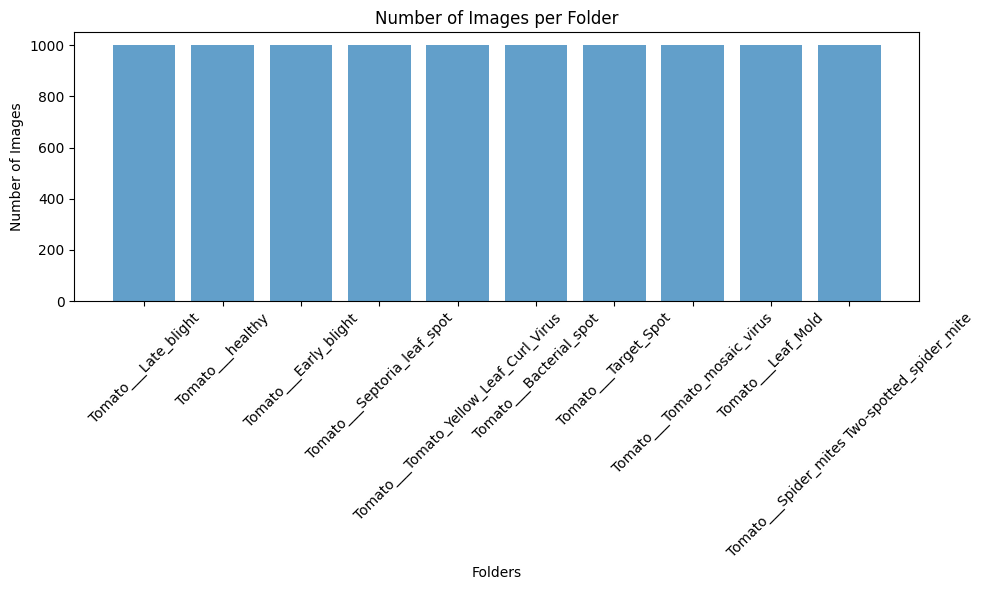

In [5]:
# Directory containing folders with images
root_dir = "/kaggle/input/tomatoleaf/tomato/train"

# Dictionary to store counts for each folder
folder_counts = {}

# Iterate through each folder in the root directory
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Count the number of image files in the folder
        num_images = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name)) and name.lower().endswith(('.png', '.jpg', '.jpeg'))])
        folder_counts[folder] = num_images

# Extract folder names and corresponding counts
folders = list(folder_counts.keys())
counts = list(folder_counts.values())

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(folders)), counts, align='center', alpha=0.7)
plt.xticks(range(len(folders)), folders, rotation=45)
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images per Folder')
plt.tight_layout()
plt.show()

In [6]:
Bacterial = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Bacterial_spot'))

Early_blight = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Early_blight'))

Late_blight = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Late_blight'))


Leaf_Mold = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Leaf_Mold'))

Septoria_leaf_spot= os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot'))

Spider_mites = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite'))


Target_Spot = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Target_Spot'))

Tomato_Yellow_Leaf = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus'))

Tomato_mosaic_viru = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus'))


healthy = os.listdir(os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___healthy'))


In [7]:
X=[] #holding data
Y=[] #label

In [8]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Bacterial):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Bacterial_spot', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(0)

In [9]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Early_blight):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Early_blight', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(1)

In [10]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Late_blight):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Late_blight', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(2)

In [11]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Leaf_Mold):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Leaf_Mold', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(3)

In [12]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Septoria_leaf_spot):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(4)

In [13]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Spider_mites):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(5)

In [14]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Target_Spot):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Target_Spot', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(6)

In [15]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Tomato_Yellow_Leaf):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(7)

In [16]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(Tomato_mosaic_viru):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(8)

In [17]:
#Resizing and turning the images into numpy method 
for i, image_name in enumerate(healthy):
    file_path = os.path.join(df, '/kaggle/input/tomatoleaf/tomato/train/Tomato___healthy', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(9)

# looking at sample of X

In [18]:
X[1]

array([[[157, 149, 162],
        [158, 150, 163],
        [158, 150, 163],
        ...,
        [151, 143, 156],
        [152, 144, 157],
        [146, 138, 151]],

       [[157, 149, 162],
        [156, 148, 161],
        [159, 151, 164],
        ...,
        [149, 141, 154],
        [151, 143, 156],
        [148, 140, 153]],

       [[153, 145, 158],
        [154, 146, 159],
        [156, 148, 161],
        ...,
        [148, 140, 153],
        [151, 143, 156],
        [146, 138, 151]],

       ...,

       [[109, 102, 110],
        [107, 100, 108],
        [108, 101, 109],
        ...,
        [114, 107, 115],
        [116, 109, 117],
        [115, 108, 116]],

       [[108, 101, 109],
        [109, 102, 110],
        [108, 101, 109],
        ...,
        [108, 101, 109],
        [118, 111, 119],
        [116, 109, 117]],

       [[115, 108, 116],
        [109, 102, 110],
        [106,  99, 107],
        ...,
        [114, 107, 115],
        [106,  99, 107],
        [113, 106, 114]]

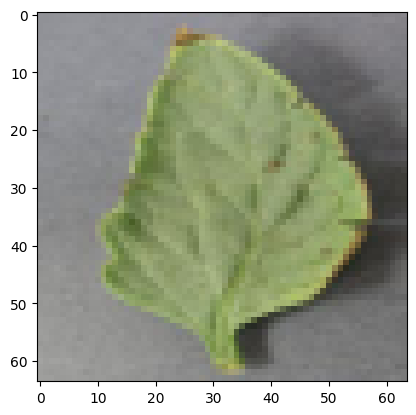

In [19]:
#X[5] is a NumPy array representing an image
image_array = X[5]

# Display the image
plt.imshow(image_array)
plt.show()

In [20]:
#seeing the length of Y
len(Y)

10000

In [21]:
#seeing the length of X
len(X)

10000

In [22]:
# turning Y to np array 
Y = np.array(Y)

In [23]:
#getting the shape of Y 
Y.shape

(10000,)

In [24]:
# turning X to np array 
X= np.array(X)

In [25]:
X.shape

(10000, 64, 64, 3)

# Splitting Data

In [26]:
# Split the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [27]:
#shape of x_train & y_train
#we will see the number of images will do training(8000) and the size(64,64) and the channels(RGB)
print(x_train.shape)
print(y_train.shape)

(8000, 64, 64, 3)
(8000,)


In [28]:
#shape of x_test & y_test
#we will see the number of images will do testing(2000) and the size(64,64) and the channels(RGB)
print(x_test.shape)
print(y_test.shape)

(2000, 64, 64, 3)
(2000,)


In [29]:
# Find the unique classes in y_test
unique_classes_test = np.unique(y_test)
print("Unique classes in y_test:", unique_classes_test)

Unique classes in y_test: [0 1 2 3 4 5 6 7 8 9]


In [30]:
# Convert y_train and y_test to one-hot encoded format
y_train = to_categorical(y_train , num_classes=10)
y_test = to_categorical(y_test , num_classes=10)

In [31]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

# Model CNN

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

# Define the number of classes
num_classes = 10

# Define a sequential model
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3,3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 4
model.add(Conv2D(32, (3,3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 5
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 6
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten layer to convert the 3D feature maps to 1D
model.add(Flatten())

# Dense layer with 64 neurons and ReLU activation
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with the number of neurons equal to the number of classes and softmax activation for multi-class classification
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model on the training data
batch_size = 32  # Define your batch size
history=model.fit(x_train, y_train, batch_size=batch_size, verbose=1, epochs=20, validation_data=(x_test, y_test), shuffle=False)

# Save the trained model to a file
model.save('Tomato_leaf_disease_detection_classification.h5')

Epoch 1/20
 27/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0900 - loss: 4.4852

I0000 00:00:1717724030.040465     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.1318 - loss: 2.6810 - val_accuracy: 0.4495 - val_loss: 1.7506
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3755 - loss: 1.7880 - val_accuracy: 0.6345 - val_loss: 1.0937
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5563 - loss: 1.2928 - val_accuracy: 0.6790 - val_loss: 0.9314
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6370 - loss: 1.1046 - val_accuracy: 0.7290 - val_loss: 0.7581
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7074 - loss: 0.9016 - val_accuracy: 0.7700 - val_loss: 0.6775
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7446 - loss: 0.7651 - val_accuracy: 0.7435 - val_loss: 0.8097
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7722 - loss: 0.6919 - val_accuracy: 0.7995 - val_loss: 0.5755
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7995 - loss: 0.6166 - val_accuracy: 0.8095 - va

# the evaluation of test data

In [34]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the model's performance
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.4970
Test Accuracy: 87.25%


# Model Performence

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       180
           1       0.74      0.78      0.76       193
           2       0.82      0.89      0.86       205
           3       0.79      0.90      0.84       193
           4       0.92      0.66      0.77       217
           5       0.80      0.94      0.86       202
           6       0.92      0.82      0.87       200
           7       0.89      0.95      0.92       198
           8       0.99      0.95      0.97       214
           9       0.96      0.97      0.96       198

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000

Confusion Matrix:
[[158   4   2   0   1   1   0  14   0   0]
 [  3 151  20   7   0   6   2   3   1   0]
 [  0  14 183   4   1   2   0   1   0   0]
 [  0   6   1 173   9   1   0   

# Plotting training and testing accuracy

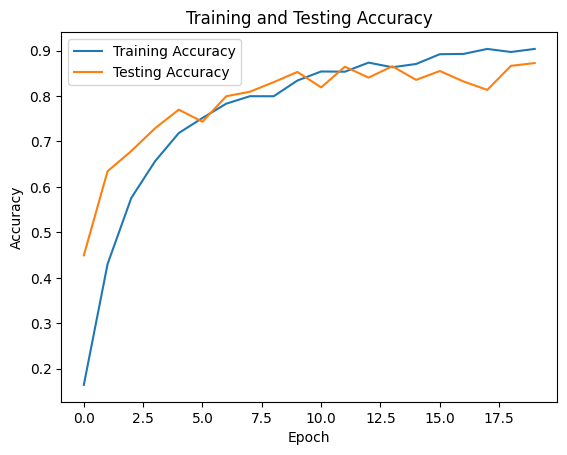

In [36]:
# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

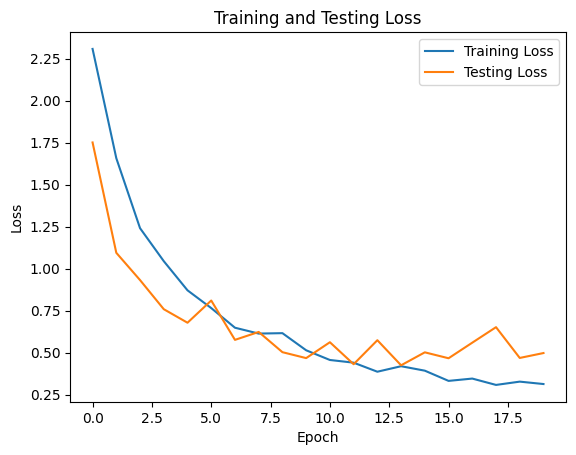

In [37]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Plot confusion matrix

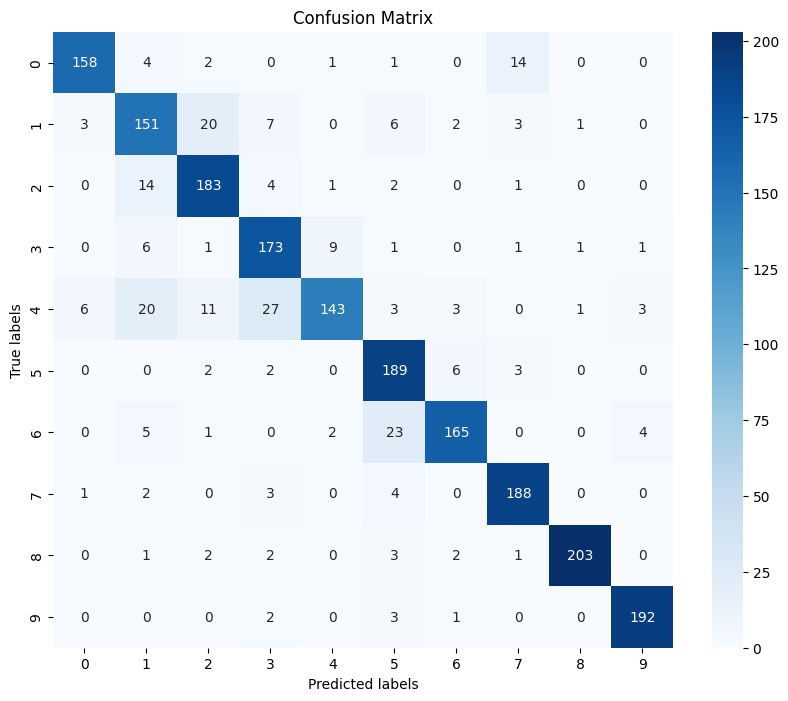

In [38]:
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Comparison of Actual and Predicted Emotions for CNN

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


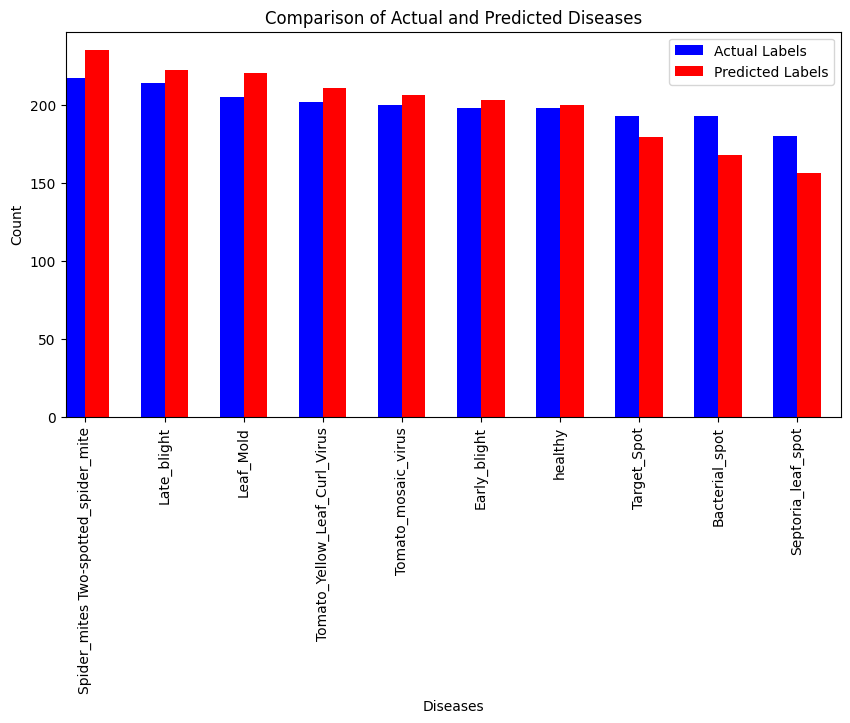

In [39]:
# Load the trained model
model = tf.keras.models.load_model('Tomato_leaf_disease_detection_classification.h5')

# Predict labels using the CNN model
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert the NumPy array of predicted labels to a pandas Series
predicted_series = pd.Series(predicted_labels)

# Get value counts of actual labels
actual_counts = np.argmax(y_test, axis=1) 
actual_counts = pd.Series(actual_counts).value_counts()

# Get value counts of predicted labels
predicted_counts = predicted_series.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))

# Define disease labels
disease_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 
                  'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
                  'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
                  'healthy']

# Plot actual labels
actual_counts.index = [disease_labels[label] for label in actual_counts.index]
actual_counts.plot(kind='bar', color='blue', width=0.3, position=1, label='Actual Labels')

# Plot predicted labels
predicted_counts.index = [disease_labels[label] for label in predicted_counts.index]
predicted_counts.plot(kind='bar', color='red', width=0.3, position=0, label='Predicted Labels')

plt.xlabel('Diseases')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Diseases')
plt.legend()
plt.show()

# let's try CNN on sample of Test

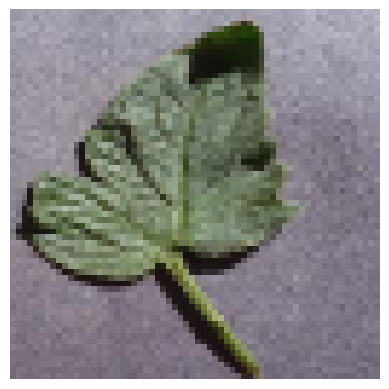

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual class: Healthy
Predicted class: Healthy


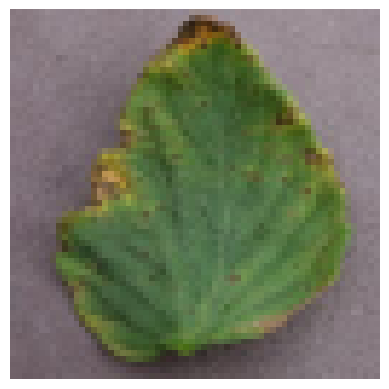

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Actual class: Bacterial_spot
Predicted class: Bacterial_spot


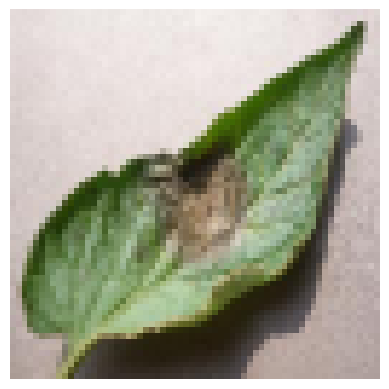

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Actual class: Late_blight
Predicted class: Late_blight


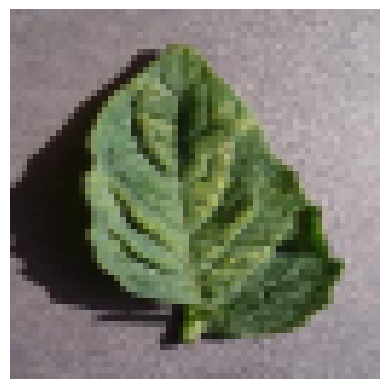

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual class: Spider_mites_Two-spotted_spider_mite
Predicted class: Spider_mites_Two-spotted_spider_mite


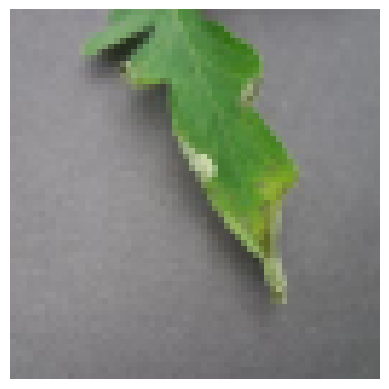

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Actual class: Late_blight
Predicted class: Late_blight


In [40]:
# Load the trained model
model = tf.keras.models.load_model('Tomato_leaf_disease_detection_classification.h5')

# Assuming x_test and y_test are your test data
for i in range(5):
    # Get the ith image and its actual label
    current_image = x_test[i]
    actual_label = y_test[i]

    # Display the image
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()

    # Get the model's prediction for the current image
    batch_prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(batch_prediction)

    # Define disease labels
    disease_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 
                      'Septoria_leaf_spot', 'Spider_mites_Two-spotted_spider_mite',
                      'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
                      'Healthy']

    # Map predicted label to class name
    predicted_class = disease_labels[predicted_label]

    # Map actual label to class name
    actual_class = disease_labels[np.argmax(actual_label)]

    # Print actual and predicted classes
    print("Actual class:", actual_class)
    print("Predicted class:", predicted_class)

# ResNet50 Model

In [41]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define the number of classes
num_classes = 10

# Load the pre-trained ResNet50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer with 64 neurons and ReLU activation
x = Dense(64, activation='relu')(x)

# Add a dropout layer
x = Dropout(0.5)(x)

# Add a final classification layer with softmax activation
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base ResNet50 model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model on the training data
batch_size = 32  # Define your batch size
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test, y_test))

# Save the trained model to a file
model.save('Tomato_leaf_disease_detection_classification_ResNet50.h5')


Epoch 1/20
 10/250 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.1374 - loss: 3.8961

W0000 00:00:1717724074.803769     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/250 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3485 - loss: 2.0409

W0000 00:00:1717724081.855348     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.3506 - loss: 2.0323 - val_accuracy: 0.7065 - val_loss: 0.9307
Epoch 2/20
 11/250 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6187 - loss: 1.0712

W0000 00:00:1717724086.397659     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6233 - loss: 1.0830 - val_accuracy: 0.7750 - val_loss: 0.6710
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6912 - loss: 0.8735 - val_accuracy: 0.7935 - val_loss: 0.6009
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7124 - loss: 0.8076 - val_accuracy: 0.8150 - val_loss: 0.5452
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7523 - loss: 0.7012 - val_accuracy: 0.8125 - val_loss: 0.5445
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7699 - loss: 0.6493 - val_accuracy: 0.8370 - val_loss: 0.4847
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7764 - loss: 0.6170 - val_accuracy: 0.8320 - val_loss: 0.4792
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7846 - loss: 0.5884 - val_accuracy: 0.8290 - val_loss: 0.4845
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8001 - loss: 0.5595 - val_accuracy: 0.841

# Evaluation

In [42]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the model's performance
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.4232
Test Accuracy: 86.30%


In [43]:
# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

13/63 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

W0000 00:00:1717724160.911955     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       180
           1       0.74      0.69      0.72       193
           2       0.80      0.79      0.79       205
           3       0.84      0.88      0.86       193
           4       0.86      0.88      0.87       217
           5       0.83      0.87      0.85       202
           6       0.83      0.78      0.80       200
           7       0.93      0.90      0.92       198
           8       0.96      0.99      0.97       214
           9       0.95      0.93      0.94       198

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Confusion Matrix:
[[166   8   3   0   0   0   1   2   0   0]
 [ 13 133  19   6   3   9   8   1   1   0]
 [  1  18 161  13   3   4   1   1   1   2]
 [  0   2   3 169  12   1   1  

W0000 00:00:1717724165.190672     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Plotting training and testing accuracy using ResNet50

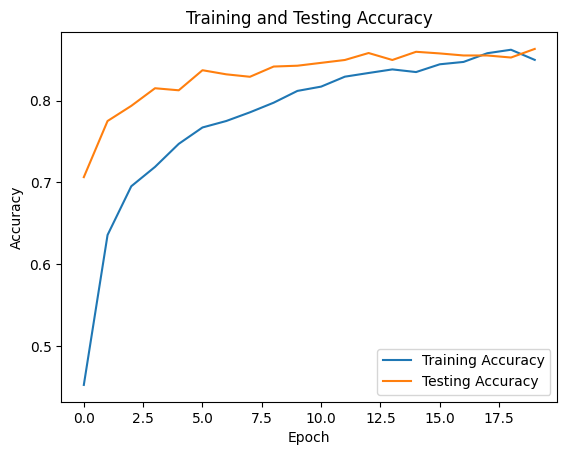

In [44]:
# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

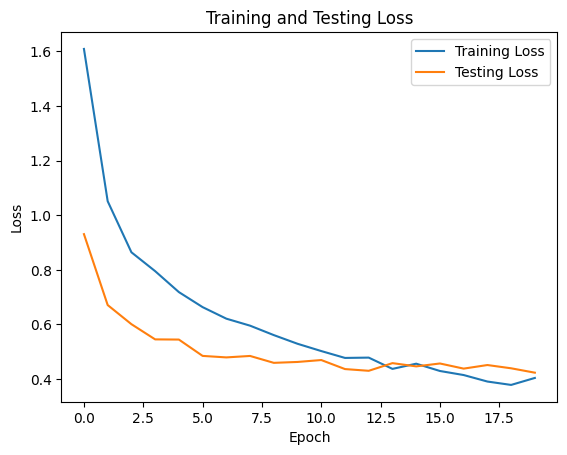

In [45]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# confusion matrix

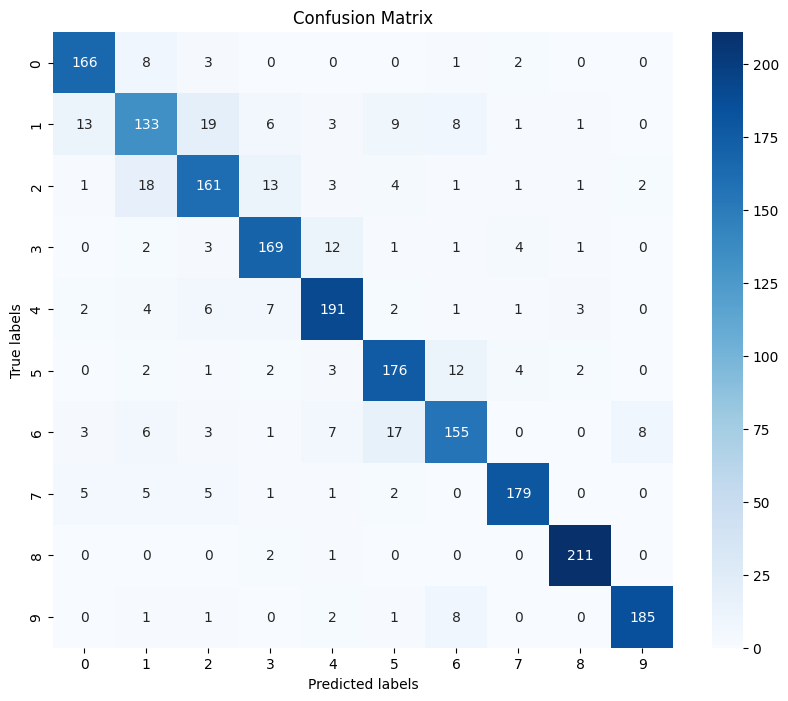

In [46]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Comparison of Actual and Predicted Emotions for ResNet50

13/63 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

W0000 00:00:1717724170.748741     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step


W0000 00:00:1717724174.624365     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


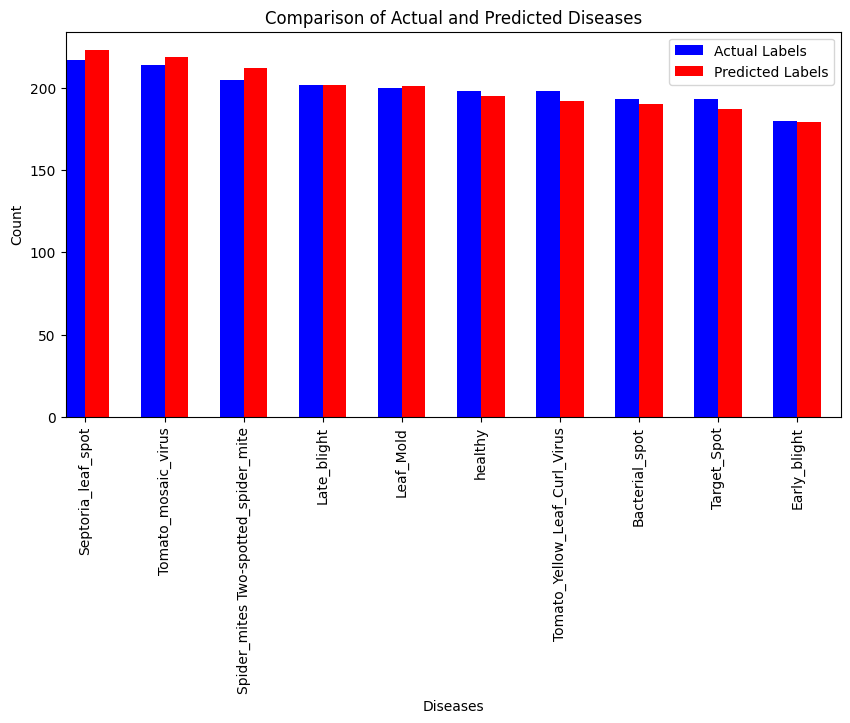

In [47]:
# Load the trained model
model = tf.keras.models.load_model('Tomato_leaf_disease_detection_classification_ResNet50.h5')

# Predict labels using the CNN model
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert the NumPy array of predicted labels to a pandas Series
predicted_series = pd.Series(predicted_labels)

# Get value counts of actual labels
actual_counts = np.argmax(y_test, axis=1) 
actual_counts = pd.Series(actual_counts).value_counts()

# Get value counts of predicted labels
predicted_counts = predicted_series.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))

# Define disease labels
disease_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 
                  'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
                  'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
                  'healthy']

# Plot actual labels
actual_counts.index = [disease_labels[label] for label in actual_counts.index]
actual_counts.plot(kind='bar', color='blue', width=0.3, position=1, label='Actual Labels')

# Plot predicted labels
predicted_counts.index = [disease_labels[label] for label in predicted_counts.index]
predicted_counts.plot(kind='bar', color='red', width=0.3, position=0, label='Predicted Labels')

plt.xlabel('Diseases')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Diseases')
plt.legend()
plt.show()

# let's try ResNet50 on sample of Test

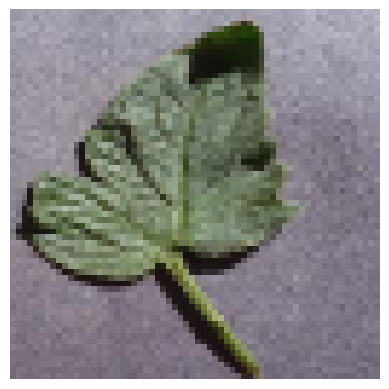

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Actual class: Healthy
Predicted class: Healthy


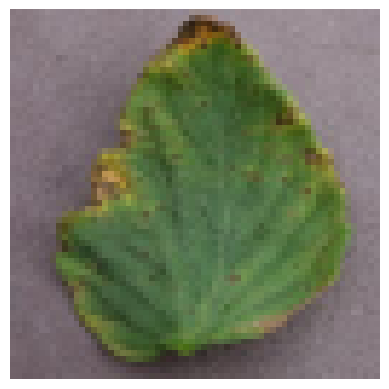

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Actual class: Bacterial_spot
Predicted class: Bacterial_spot


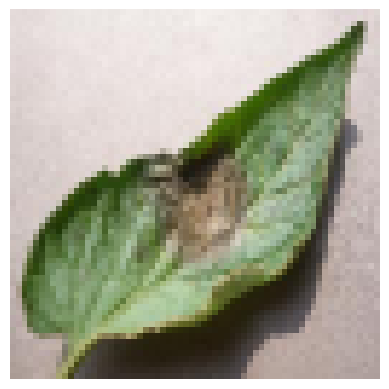

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Actual class: Late_blight
Predicted class: Late_blight


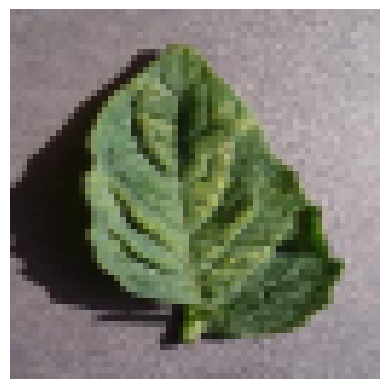

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Actual class: Spider_mites_Two-spotted_spider_mite
Predicted class: Spider_mites_Two-spotted_spider_mite


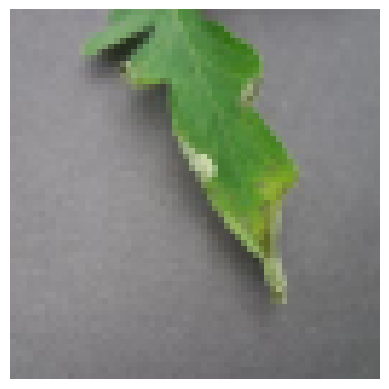

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Actual class: Late_blight
Predicted class: Late_blight


In [48]:
# Load the trained model
model = tf.keras.models.load_model('Tomato_leaf_disease_detection_classification_ResNet50.h5')

# Assuming x_test and y_test are your test data
for i in range(5):
    # Get the ith image and its actual label
    current_image = x_test[i]
    actual_label = y_test[i]

    # Display the image
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()

    # Get the model's prediction for the current image
    batch_prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(batch_prediction)

    # Define disease labels
    disease_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 
                      'Septoria_leaf_spot', 'Spider_mites_Two-spotted_spider_mite',
                      'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
                      'Healthy']

    # Map predicted label to class name
    predicted_class = disease_labels[predicted_label]

    # Map actual label to class name
    actual_class = disease_labels[np.argmax(actual_label)]

    # Print actual and predicted classes
    print("Actual class:", actual_class)
    print("Predicted class:", predicted_class)

# EfficientNetB0

In [49]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define the number of classes
num_classes = 10

# Load the pre-trained EfficientNetB0 model without the top (classification) layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer with 64 neurons and ReLU activation
x = Dense(64, activation='relu')(x)

# Add a dropout layer
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final classification layer with softmax activation
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base EfficientNetB0 model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base EfficientNetB0 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model on the training data
batch_size = 32  # Define your batch size
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test, y_test))

# Save the trained model to a file
model.save('Tomato_leaf_disease_detection_classification_EfficientNetB0.h5')

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
 16/250 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1071 - loss: 2.3624

W0000 00:00:1717724213.590879     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2893 - loss: 1.9638

W0000 00:00:1717724221.116877     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.2913 - loss: 1.9591 - val_accuracy: 0.6425 - val_loss: 1.1695
Epoch 2/20
 16/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5077 - loss: 1.3962

W0000 00:00:1717724227.260549     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5239 - loss: 1.3665 - val_accuracy: 0.7035 - val_loss: 0.9872
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5908 - loss: 1.1793 - val_accuracy: 0.7120 - val_loss: 0.8530
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6301 - loss: 1.0677 - val_accuracy: 0.7265 - val_loss: 0.8122
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6482 - loss: 1.0137 - val_accuracy: 0.7490 - val_loss: 0.7548
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6596 - loss: 0.9728 - val_accuracy: 0.7540 - val_loss: 0.7298
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6665 - loss: 0.9555 - val_accuracy: 0.7695 - val_loss: 0.6883
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6866 - loss: 0.8863 - val_accuracy: 0.7740 - val_loss: 0.6497
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6843 - loss: 0.8929 - val_accuracy: 0.7825 - val_

# Evaluation

In [50]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the model's performance
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.5589
Test Accuracy: 81.20%


# Classification Report

In [51]:
# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

22/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

W0000 00:00:1717724274.616416     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       180
           1       0.69      0.74      0.71       193
           2       0.85      0.72      0.78       205
           3       0.85      0.79      0.82       193
           4       0.82      0.71      0.76       217
           5       0.73      0.88      0.80       202
           6       0.73      0.71      0.72       200
           7       0.92      0.86      0.89       198
           8       0.94      0.95      0.94       214
           9       0.85      0.91      0.88       198

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000

Confusion Matrix:
[[152  10   2   0   8   1   4   1   1   1]
 [ 10 142  12   4   5   5   6   5   3   1]
 [  4  33 147  10   6   2   0   0   0   3]
 [  2   4   1 153   5   8   4 

W0000 00:00:1717724280.266507     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Plotting training and testing accuracy

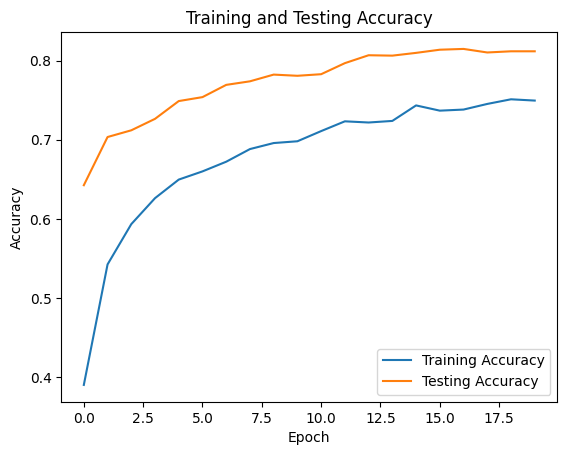

In [52]:
# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

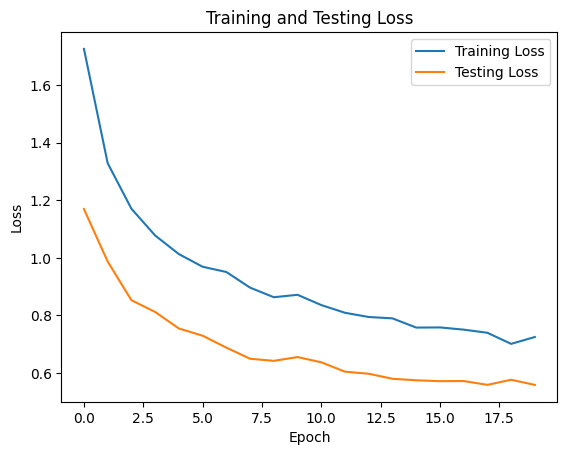

In [53]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# confusion matrix

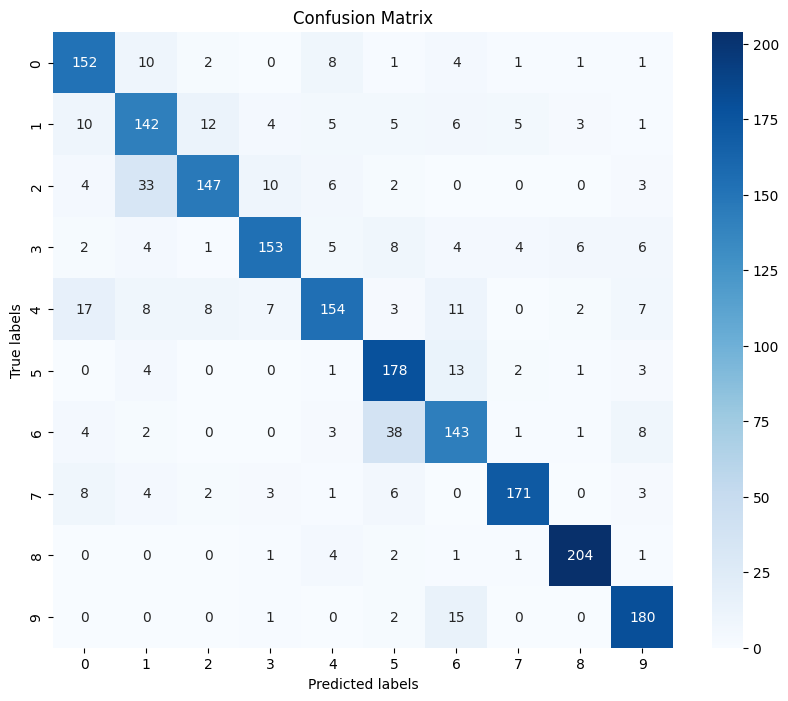

In [54]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Comparison of Actual and Predicted Emotions for EfficientNetB0

22/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

W0000 00:00:1717724288.004997     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step


W0000 00:00:1717724293.368626     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


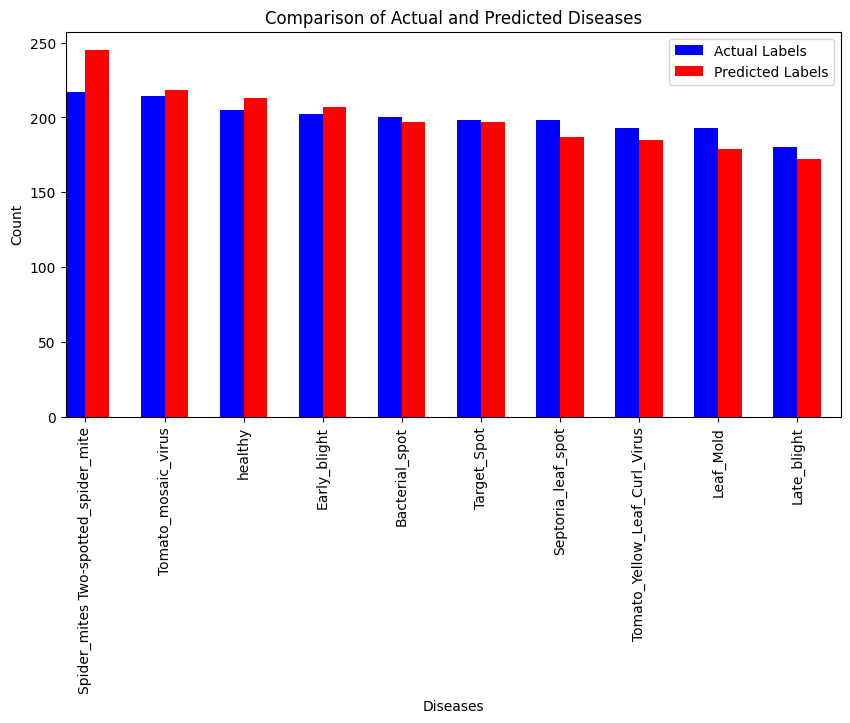

In [55]:
# Load the trained model
model = tf.keras.models.load_model('Tomato_leaf_disease_detection_classification_EfficientNetB0.h5')

# Predict labels using the CNN model
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert the NumPy array of predicted labels to a pandas Series
predicted_series = pd.Series(predicted_labels)

# Get value counts of actual labels
actual_counts = np.argmax(y_test, axis=1) 
actual_counts = pd.Series(actual_counts).value_counts()

# Get value counts of predicted labels
predicted_counts = predicted_series.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))

# Define disease labels
disease_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 
                  'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
                  'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
                  'healthy']

# Plot actual labels
actual_counts.index = [disease_labels[label] for label in actual_counts.index]
actual_counts.plot(kind='bar', color='blue', width=0.3, position=1, label='Actual Labels')

# Plot predicted labels
predicted_counts.index = [disease_labels[label] for label in predicted_counts.index]
predicted_counts.plot(kind='bar', color='red', width=0.3, position=0, label='Predicted Labels')

plt.xlabel('Diseases')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Diseases')
plt.legend()
plt.show()

# let's try EfficientNetB0 on sample of Test

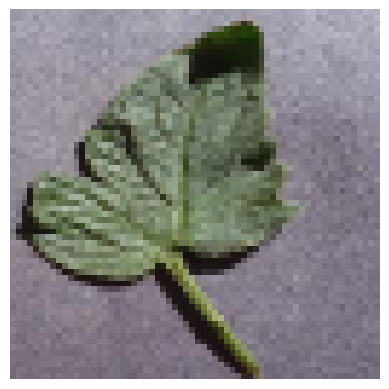

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Actual class: Healthy
Predicted class: Healthy


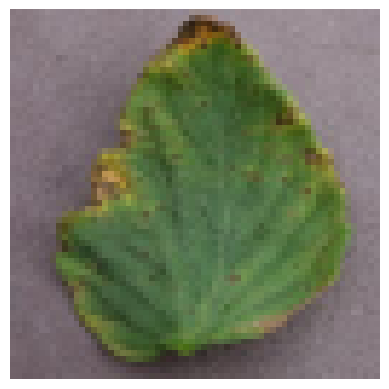

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Actual class: Bacterial_spot
Predicted class: Septoria_leaf_spot


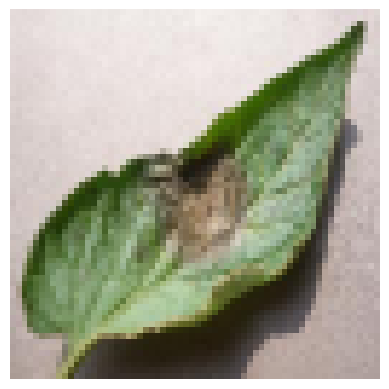

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Actual class: Late_blight
Predicted class: Late_blight


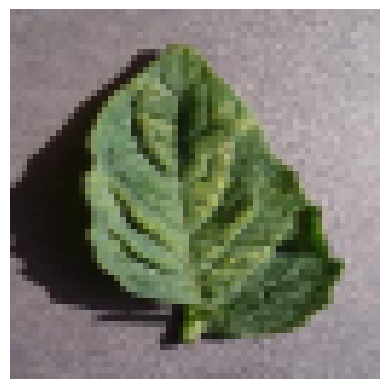

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Actual class: Spider_mites_Two-spotted_spider_mite
Predicted class: Spider_mites_Two-spotted_spider_mite


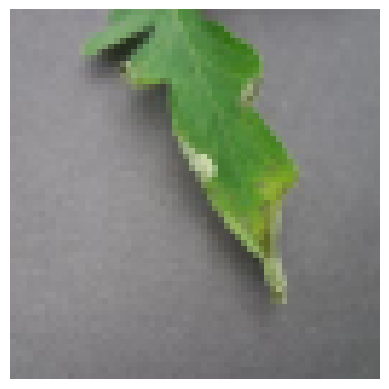

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Actual class: Late_blight
Predicted class: Late_blight


In [56]:
# Load the trained model
model = tf.keras.models.load_model('Tomato_leaf_disease_detection_classification_EfficientNetB0.h5')

# Assuming x_test and y_test are your test data
for i in range(5):
    # Get the ith image and its actual label
    current_image = x_test[i]
    actual_label = y_test[i]

    # Display the image
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()

    # Get the model's prediction for the current image
    batch_prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(batch_prediction)

    # Define disease labels
    disease_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 
                      'Septoria_leaf_spot', 'Spider_mites_Two-spotted_spider_mite',
                      'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
                      'Healthy']

    # Map predicted label to class name
    predicted_class = disease_labels[predicted_label]

    # Map actual label to class name
    actual_class = disease_labels[np.argmax(actual_label)]

    # Print actual and predicted classes
    print("Actual class:", actual_class)
    print("Predicted class:", predicted_class)

# VGG_16 Model

In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define the number of classes
num_classes = 10

# Load the pre-trained VGG16 model without the top (classification) layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer with 64 neurons and ReLU activation
x = Dense(64, activation='relu')(x)

# Add a dropout layer
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final classification layer with softmax activation
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base VGG16 model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model on the training data
batch_size = 32  # Define your batch size
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test, y_test))

# Save the trained model to a file
model.save('Tomato_leaf_disease_detection_classification_VGG16.h5')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
 13/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1157 - loss: 20.4277

W0000 00:00:1717724311.023761     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1854 - loss: 6.4406

W0000 00:00:1717724315.435190     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.1857 - loss: 6.4161 - val_accuracy: 0.4380 - val_loss: 1.6927
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3428 - loss: 1.8659 - val_accuracy: 0.5745 - val_loss: 1.3118
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4376 - loss: 1.5628 - val_accuracy: 0.6335 - val_loss: 1.1262
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5029 - loss: 1.3983 - val_accuracy: 0.6705 - val_loss: 1.0172
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5578 - loss: 1.2399 - val_accuracy: 0.7085 - val_loss: 0.9052
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5864 - loss: 1.1632 - val_accuracy: 0.7130 - val_loss: 0.8654
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6203 - loss: 1.0694 - val_accuracy: 0.7305 - val_loss: 0.8143
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6386 - loss: 0.9965 - val_accuracy: 0.75

# Evaluation

In [58]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the model's performance
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.6638
Test Accuracy: 78.25%


# classification Report

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

15/63 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

W0000 00:00:1717724404.384997     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       180
           1       0.63      0.66      0.65       193
           2       0.81      0.60      0.69       205
           3       0.77      0.76      0.76       193
           4       0.74      0.78      0.76       217
           5       0.77      0.69      0.73       202
           6       0.68      0.79      0.73       200
           7       0.86      0.80      0.83       198
           8       0.92      0.98      0.95       214
           9       0.92      0.91      0.92       198

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000

Confusion Matrix:
[[152   6   2   2   7   0   5   6   0   0]
 [ 18 128  13   3   7   6  13   4   1   0]
 [  6  39 123  17   9   3   6   2   0   0]
 [  1   6   3 146  14   7   4  

# Plotting training and testing accuracy

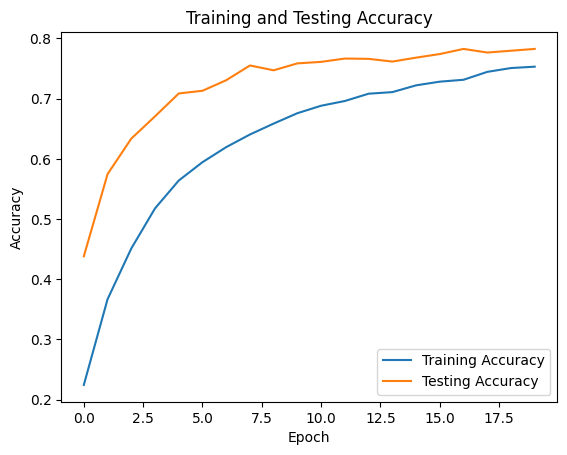

In [60]:
# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

# Plot the training and testing loss

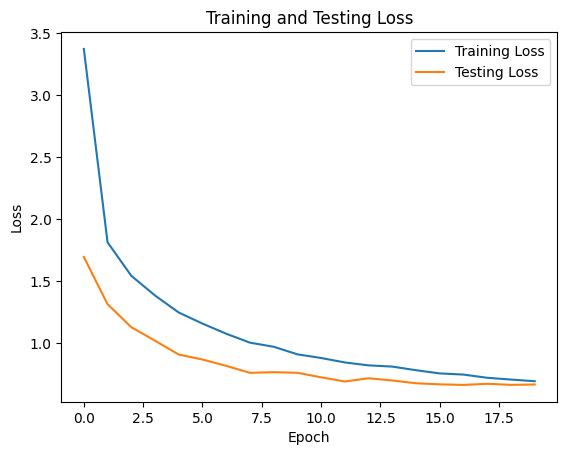

In [61]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Plot confusion matrix

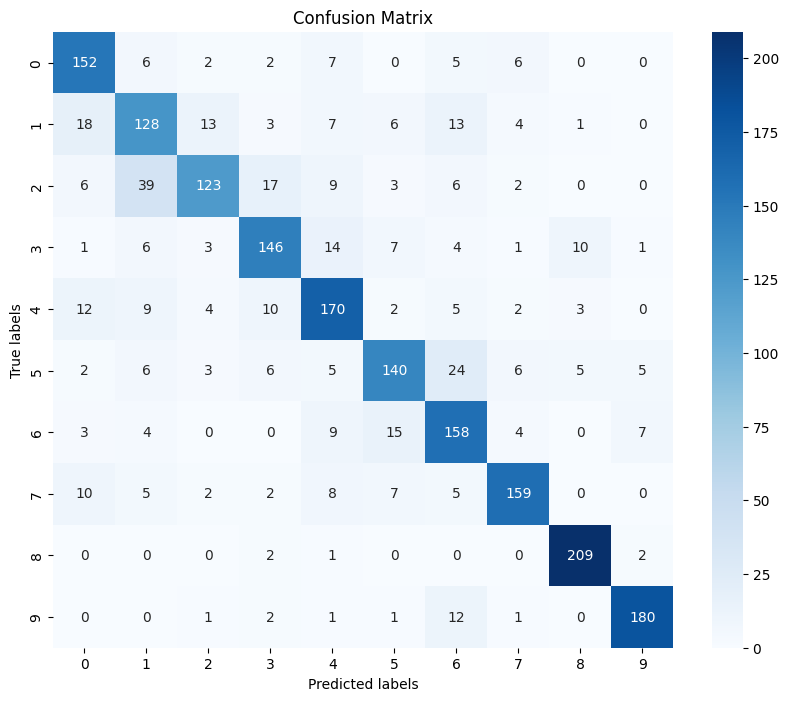

In [62]:
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Comparison of Actual and Predicted using model VGG16

12/63 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

W0000 00:00:1717724407.826363     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


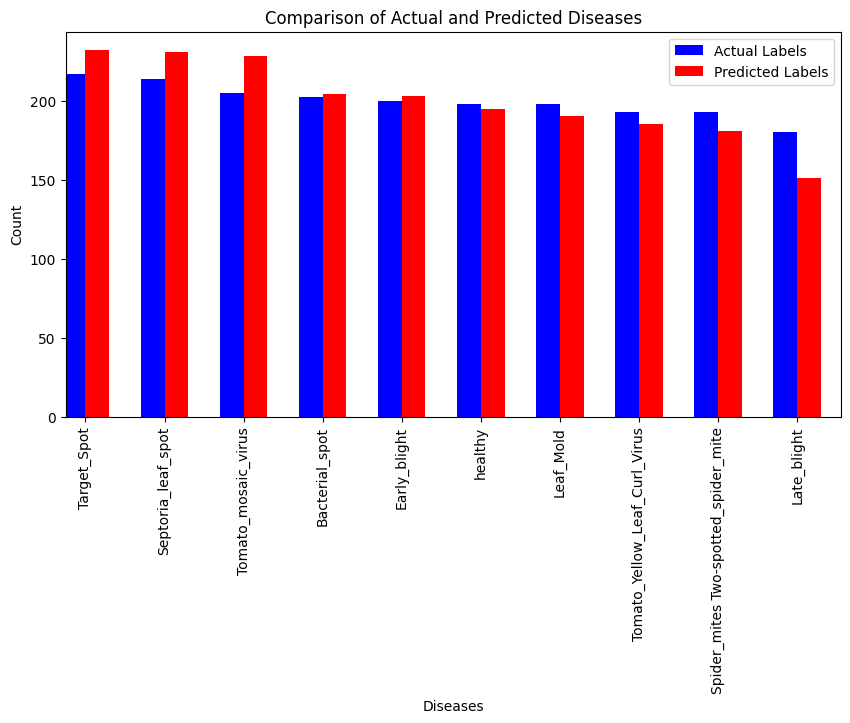

In [63]:
# Load the trained model
model = tf.keras.models.load_model('Tomato_leaf_disease_detection_classification_VGG16.h5')

# Predict labels using the CNN model
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert the NumPy array of predicted labels to a pandas Series
predicted_series = pd.Series(predicted_labels)

# Get value counts of actual labels
actual_counts = np.argmax(y_test, axis=1) 
actual_counts = pd.Series(actual_counts).value_counts()

# Get value counts of predicted labels
predicted_counts = predicted_series.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))

# Define disease labels
disease_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 
                  'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
                  'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
                  'healthy']

# Plot actual labels
actual_counts.index = [disease_labels[label] for label in actual_counts.index]
actual_counts.plot(kind='bar', color='blue', width=0.3, position=1, label='Actual Labels')

# Plot predicted labels
predicted_counts.index = [disease_labels[label] for label in predicted_counts.index]
predicted_counts.plot(kind='bar', color='red', width=0.3, position=0, label='Predicted Labels')

plt.xlabel('Diseases')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Diseases')
plt.legend()
plt.show()

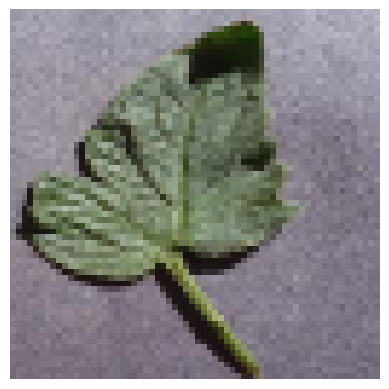

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Actual class: Healthy
Predicted class: Healthy


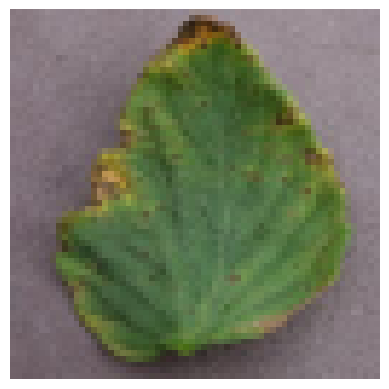

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Actual class: Bacterial_spot
Predicted class: Target_Spot


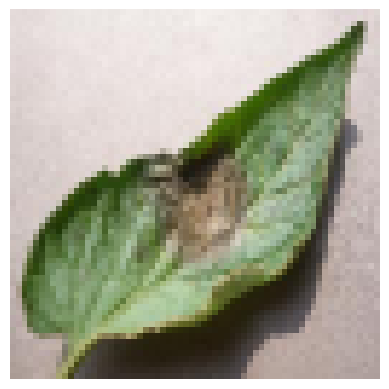

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Actual class: Late_blight
Predicted class: Late_blight


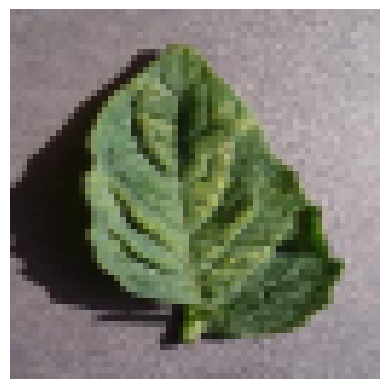

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Actual class: Spider_mites_Two-spotted_spider_mite
Predicted class: Spider_mites_Two-spotted_spider_mite


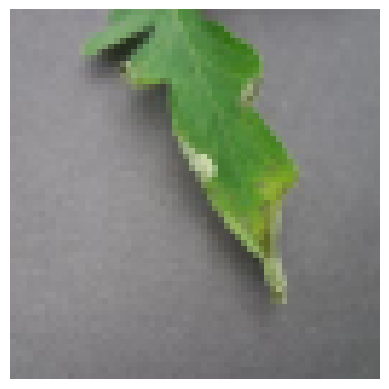

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Actual class: Late_blight
Predicted class: Late_blight


In [64]:
# Load the trained model
model = tf.keras.models.load_model('Tomato_leaf_disease_detection_classification_VGG16.h5')

# Assuming x_test and y_test are your test data
for i in range(5):
    # Get the ith image and its actual label
    current_image = x_test[i]
    actual_label = y_test[i]

    # Display the image
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()

    # Get the model's prediction for the current image
    batch_prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(batch_prediction)

    # Define disease labels
    disease_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 
                      'Septoria_leaf_spot', 'Spider_mites_Two-spotted_spider_mite',
                      'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
                      'Healthy']

    # Map predicted label to class name
    predicted_class = disease_labels[predicted_label]

    # Map actual label to class name
    actual_class = disease_labels[np.argmax(actual_label)]

    # Print actual and predicted classes
    print("Actual class:", actual_class)
    print("Predicted class:", predicted_class)